In [1]:
#aim: automate 2+sersic obj fitting given input dictionary of "groups"

In [2]:
import numpy as np
import os
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.table import Table
from astropy.wcs import WCS
from astropy.io import fits
from astropy.io import ascii
from scipy.stats import scoreatpercentile
from astropy.visualization import simple_norm
from astropy.table import QTable

In [5]:
homedir = os.getenv("HOME")
vfmain = Table.read(homedir+'/github/research/sample_main_two.fits')
t_full = Table.read(homedir+'/Desktop/v1-20210308/vf_north_v1_main.fits')
os.chdir(homedir+'/github/WISE_232_psf')
%run ~/github/research/run_galfit.py

In [6]:
#g1, g2 are sersic objects that appear in one cutout with dimensions 3*D25 x 3*D25

obj1 = t_full[481]
obj2 = t_full[483]

g1 = galaxy(obj1['RA'],obj1['DEC'],obj1['radius'],name=obj1['prefix'],band=3)

In [7]:
g1.image = homedir+'/VFID0481/unwise-VFID0481-w3-img-m-trim.fits'
g1.mask_image = homedir+'/VFID0481/unwise-VFID0481-w3-img-m-mask-trim.fits'
g1.sigma_image = homedir+'/VFID0481/unwise-VFID0481-w3-std-m-trim.fits'
g1.invvar_image = homedir+'/VFID0481/unwise-VFID0481-w3-img-m-inv-mask-trim.fits'

g1.ximagesize=len(fits.getdata(g1.image))
g1.yimagesize=len(fits.getdata(g1.image))

In [8]:
g1.set_image_names()

In [9]:
g1.getpix()

In [10]:
g1.initialize_galfit(convflag=False)

self.psfimage =  wise-w3-psf-wpro-09x09-05x05.fits


In [11]:
g1.set_sersic_manual(n=2,m=10,re=10,BA=1,PA=10)

In [12]:
homedir = os.getenv("HOME")
g1.run_galfit_wise(fitBA=1,fitPA=1)

sersic n, fitsersicn =  2 1
BA, fitBA =  1 1
run the following:  galfit VFID0481-NGC6307-unwise-w3-galfit.input.2Comp


In [13]:
g1.write_results(printflag=True)

1_XC  : 59.4989 +/- 0.0312
1_YC  : 59.4014 +/- 0.0420
1_MAG : 8.5756 +/- 0.0370
1_RE  : 7.7704 +/- 0.3882
1_N   : 1.6535 +/- 0.0658
1_AR  : 0.7099 +/- 0.0169
1_PA  : -36.0069 +/- 2.7410
2_XC  : 69.2503 +/- 0.0045
2_YC  : 30.6427 +/- 0.0050
2_MAG : 6.1845 +/- 0.0020
2_RE  : 3.3253 +/- 0.0091
2_N   : 1.1749 +/- 0.0065
2_AR  : 0.7497 +/- 0.0016
2_PA  : -15.8774 +/- 0.2864
3_SKY : 47.9778 +/- 2.5646


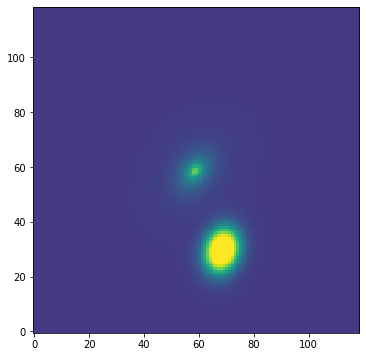

In [12]:
im,h = fits.getdata(homedir+'/github/WISE_232_psf/VFID0481-NGC6307-unwise-w3-1Comp-galfit-out.fits',1,header=True)
model = fits.getdata(homedir+'/github/WISE_232_psf/VFID0481-NGC6307-unwise-w3-1Comp-galfit-out.fits',2)


norms = [simple_norm(im,'asinh',max_percent=99.5)]

plt.figure(figsize=(14,6))
plt.imshow(model,origin='lower',norm=norms[0])

---

In [136]:
# below are group dictionaries (group_dict --> known pairs; coord_dict --> postage stamp indices with 
# 1+ off-centered sersic obj, along with the off-centered group members given in group_dict)

group_dict = {'group0': ['VFID0481', 'VFID0483'],
 'group1': ['VFID1548', 'VFID1552'],
 'group2': ['VFID1791', 'VFID1794'],
 'group3': ['VFID1863', 'VFID1864'],
 'group4': ['VFID1935', 'VFID1936'],
 'group5': ['VFID1961', 'VFID1962'],
 'group6': ['VFID2068', 'VFID2075', 'VFID2076'],
 'group7': ['VFID2371', 'VFID2372'],
 'group8': ['VFID2667', 'VFID2669'],
 'group9': ['VFID2672', 'VFID2679'],
 'group10': ['VFID2726', 'VFID2729'],
 'group11': ['VFID2762', 'VFID2766'],
 'group12': ['VFID3554', 'VFID3543', 'VFID3549'],
 'group13': ['VFID3708', 'VFID3711'],
 'group14': ['VFID3860', 'VFID3854'],
 'group15': ['VFID3862', 'VFID3872'],
 'group16': ['VFID3953', 'VFID3960'],
 'group17': ['VFID4180', 'VFID4182'],
 'group18': ['VFID4256', 'VFID4258'],
 'group19': ['VFID4302', 'VFID4305'],
 'group20': ['VFID4508', 'VFID4468', 'VFID4542'],
 'group21': ['VFID4525', 'VFID4547'],
 'group22': ['VFID4660', 'VFID4682', 'VFID4696'],
 'group23': ['VFID4861', 'VFID4869'],
 'group24': ['VFID4923', 'VFID4928'],
 'group25': ['VFID4977', 'VFID4978'],
 'group26': ['VFID4980', 'VFID4969'],
 'group27': ['VFID5432', 'VFID5414', 'VFID5467', 'VFID5492'],
 'group28': ['VFID5536', 'VFID5525'],
 'group29': ['VFID6035', 'VFID6050'],
 'group30': ['VFID6098', 'VFID6094'],
 'group31': ['VFID6104', 'VFID6112'],
 'group32': ['VFID6438', 'VFID6426']}


coord_dict = {'index22': [35,32],
             'index188': [46,33],
             'index313': [72,80],
             'index329': [100,118],
             'index390': [249,280],
             'index530': [28,50],
             'index560': [30,53],
             'index582': [26,28],
             'index690': [75,34],
             'index808': [60,75],
             'index955': [135,48],
             'VFID0483': [70,30],
             'VFID1548': [220,347],
             'VFID1794': [143,94],
             'VFID1864': [38,29],
             'VFID1936': [45,70],
             'VFID1962': [70,49],
             'VFID2068': [152,213],
             'VFID2076': [133,107],
             'VFID2371': [34,50],
             'VFID2669': [126,87],
             'VFID2679': [288,110],
             'VFID2729': [93,39],
             'VFID2766': [74,36],
             'VFID3543': [65,239],
             'VFID3549': [252,214],
             'VFID3708': [150,174],
             'VFID3854': [62,259],
             'VFID3862': [178,326],
             'VFID3953': [108,176],
             'VFID4180': [50,76],
             'VFID4256': [243,206],
             'VFID4305': [59,77],
             'VFID4468': [100,457],
             'VFID4525': [278,341],
             'VFID4542': [449,87],
             'VFID4682': [167,102],
             'VFID4696': [375,167],
             'VFID4861': [204,158],
             'VFID4923': [262,261],
             'VFID4977': [150,170],
             'VFID4969': [456,359],
             'VFID5414': [386,455],
             'VFID5467': [298,22],
             'VFID5525': [77,390],
             'VFID6035': [317,312],
             'VFID6094': [244,211],
             'VFID6112': [394,181],
             'VFID6426': [389,266]}

dummy_list = ['index22','index188','index313','index329','index390','index530','index560','index582',
              'index690','index808','index955']
group_list = ['VFID0483','VFID1548','VFID1794','VFID1864','VFID1936','VFID1962','VFID2068','VFID2076',
             'VFID2371','VFID2669','VFID2679','VFID2729','VFID2766','VFID3543','VFID3549','VFID3708',
              'VFID3854','VFID3862','VFID3953','VFID4180','VFID4256','VFID4305','VFID4468','VFID4525',
             'VFID4542','VFID4682','VFID4696','VFID4861','VFID4923','VFID4977','VFID4969','VFID5414',
              'VFID5467','VFID5525','VFID6035','VFID6094','VFID6112','VFID6426']

#following galaxies represent central galaxies that host either the dummy or group counterpart
#typed group hosts first; append dummy host IDs
central_list = ['VFID0047','VFID0816','VFID1500','VFID1578','VFID1963','VFID3023','VFID3244','VFID3414',
                'VFID4168','VFID4945','VFID6137','VFID0481','VFID1552','VFID1791','VFID1863','VFID1935','VFID1961','VFID2075','VFID2075',
                'VFID2372','VFID2667','VFID2672','VFID2726','VFID2762','VFID3554','VFID3554','VFID3711',
                'VFID3860','VFID3872','VFID3960','VFID4182','VFID4258','VFID4302','VFID4508','VFID4547',
               'VFID4508','VFID4660','VFID4660','VFID4869','VFID4928','VFID4978','VFID4980','VFID5432',
                'VFID5432','VFID5536','VFID6050','VFID6098','VFID6104','VFID6438']

In [137]:
li = dummy_list+group_list
x = []
y = []
for i in li:
    xi = coord_dict['{}'.format(i)][0]
    yi = coord_dict['{}'.format(i)][1]
    x.append(xi)
    y.append(yi)

In [138]:
full = dummy_list+group_list
flag = np.zeros(len(full),dtype=int)


t = QTable([full,central_list,x,y,flag],names=['ID','central galaxy','x (px)','y (px)','done_flag'])

In [139]:
t.show_in_notebook()

idx,ID,central galaxy,x (px),y (px),done_flag
0,index22,VFID0047,35,32,0
1,index188,VFID0816,46,33,0
2,index313,VFID1500,72,80,0
3,index329,VFID1578,100,118,0
4,index390,VFID1963,249,280,0
5,index530,VFID3023,28,50,0
6,index560,VFID3244,30,53,0
7,index582,VFID3414,26,28,0
8,index690,VFID4168,75,34,0
9,index808,VFID4945,60,75,0


In [140]:
os.chdir(homedir)
ascii.write(t,'dummycat.fits',overwrite=True)